In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [0]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

In [13]:
!pip install pydotplus

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 286kB 308kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=304f004bafecea1117c24c2c5239a02c7f2941472bfa0a46b3b8ec9ad1a8c824
  Stored in directory: /home/aistudio/.cache/pip/wheels/be/29/7a/36a7ecae7907726ecc5a66d072bd94df72ec602bff3a693f0d
Successfully built pydotplus


(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


<Figure size 640x480 with 1 Axes>

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.80      0.80      0.80        54
           2       0.90      0.84      0.87        44
           3       0.85      0.76      0.80        46
           4       0.91      0.86      0.88        35
           5       0.86      0.88      0.87        48
           6       0.94      0.96      0.95        51
           7       0.89      0.89      0.89        35
           8       0.74      0.79      0.77        58
           9       0.74      0.80      0.77        44

   micro avg       0.85      0.85      0.85       450
   macro avg       0.86      0.85      0.86       450
weighted avg       0.85      0.85      0.85       450

fact.head(20): [1 3 7 3 2 4 6 1 4 0 4 7 8 9 2 8 3 6 7 0]
predict.head(20): [2 3 7 9 2 4 6 1 4 0 4 7 8 9 2 8 8 6 7 0]
[[143   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0 

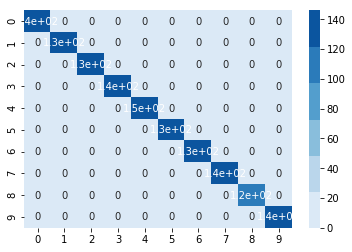

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

digits = load_digits()
data = digits.data

print(data.shape)

print(digits.images[0])

print(digits.target[0])

plt.gray()
plt.imshow(digits.images[0])
plt.show()

train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

#lr = LogisticRegression()
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(train_ss_x, train_y)
predict_y=clf.predict(test_ss_x)
print(classification_report(test_y,predict_y))
print('fact.head(20):',test_y[:20])
print('predict.head(20):',predict_y[:20])

from sklearn.metrics import confusion_matrix
cn = confusion_matrix(train_y, clf.predict(train_ss_x))
print(cn)

print('LR accurate rate: %0.4lf' % accuracy_score(predict_y, test_y))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cn, cmap = sns.color_palette("Blues"), annot=True)

In [10]:
#K折交叉验证
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
def fit_model_k_fold(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    k_fold = KFold(n_splits=10)
    
    #  Create a decision tree clf object
    clf = DecisionTreeClassifier(criterion="gini",random_state=80)

    params = {'max_depth':range(1,21),'criterion':np.array(['entropy','gini'])}

    # Transform 'accuracy_score' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(accuracy_score)

    # Create the grid search object
    grid = GridSearchCV(clf, param_grid=params,scoring=scoring_fnc,cv=k_fold)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

fit_model_k_fold(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=80,
            splitter='best')

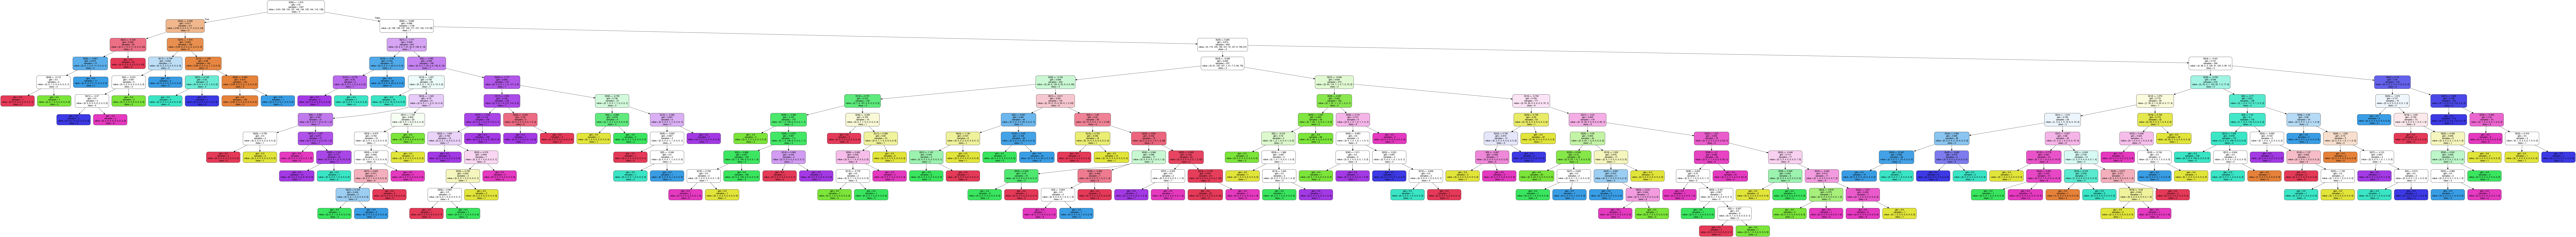

In [18]:
#可视化决策树
from IPython.display import Image  
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                         class_names=['0','1','2','3','4','5','6','7','8','9'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


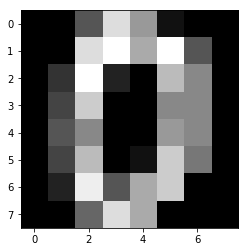

KNN准确率: 0.9756
SVM准确率: 0.9867
多项式朴素贝叶斯准确率: 0.8844
CART决策树准确率: 0.8489


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
# -*- coding: utf-8 -*-
# 手写数字分类在四种算法的比较
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y) 
predict_y = knn.predict(test_ss_x) 
print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(test_y, predict_y))

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 